In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def count(a,b):
    miny  = round(min(b),3)
    minx = round(min(a),3)
    
    maxy = round(max(b),3)
    maxx = round(max(a),3)
    
    x = np.linspace(minx,maxx,(maxx-minx)*100+2)
    y = np.linspace(miny,maxy,(maxy-miny)*100+2)

    counts = np.zeros((len(y),len(x)))
    min_x = int(round(100*min(a)))
    min_y = int(round(100*min(b)))
    a1= [int(round(100 * i)) for i in a]
    b1= [int(round(100 * i)) for i in b]

    for i in range(len(a)):
        counts[b1[i]-min_y,a1[i]-min_x] +=1

    freq_vec = [0] * len(a)
    for i in range(len(a)):
        freq_vec[i]=counts[b1[i]-min_y,a1[i]-min_x]
    return [x,y,counts,freq_vec] 

In [3]:
mydata = np.genfromtxt("out_watts",delimiter="\t")

In [4]:
density = [i[6] for i in mydata]
clustc = [i[7] for i in mydata]
S_R_ratio = [i[0]/i[1] for i in mydata]
S_R_winratio = [i[2]/i[3] for i in mydata]
RinitDen = [i[8] for i in mydata]
verts = [i[5] for i in mydata]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars


## Overview

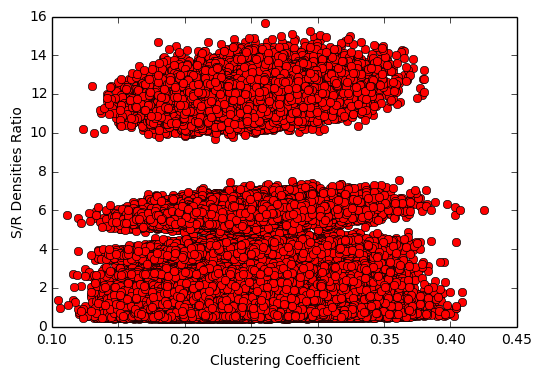

In [5]:
%matplotlib inline
plt.plot(clustc,S_R_ratio,'ro')
plt.ylabel("S/R Densities Ratio")
plt.xlabel("Clustering Coefficient")
plt.show()

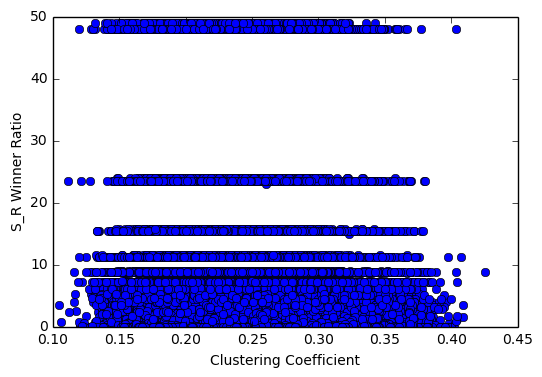

In [6]:
plt.plot(clustc,S_R_winratio,'bo')
plt.ylabel("S_R Winner Ratio")
plt.xlabel("Clustering Coefficient")
plt.show()

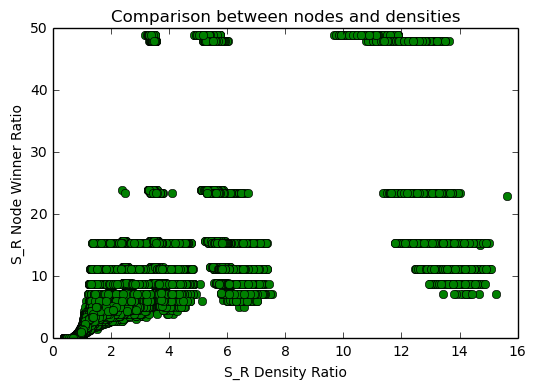

In [7]:
plt.plot(S_R_ratio,S_R_winratio,'go')
plt.ylabel("S_R Node Winner Ratio")
plt.xlabel("S_R Density Ratio")
plt.title("Comparison between nodes and densities")
plt.show()

In [8]:
x,y,z,freq_vec = count(clustc,S_R_winratio)
x, y = np.meshgrid(x, y)

x2,y2,z2,freq_vec2 = count(clustc,S_R_ratio)

x3,y3,z3,freq_vec3 = count(density,S_R_winratio)

x4,y4,z4,freq_vec4 = count(density,S_R_ratio)

OverflowError: cannot convert float infinity to integer

In [ ]:
plt.scatter(clustc,S_R_winratio, c = freq_vec)
plt.gray() 
cbar = plt.colorbar(cmap=cm.gray(max(freq_vec)-min(freq_vec)))
cbar.set_label('Frequency')
plt.title("Resistant Microenvironment Selection on Clustering Coefficient")
plt.ylabel("S/R Winner Ratio ")
plt.xlabel("Global Clustering Coefficient")
plt.show()

In [ ]:
plt.scatter(clustc,S_R_ratio, c = freq_vec2)
plt.gray() 
cbar = plt.colorbar(cmap=cm.gray(max(freq_vec2)-min(freq_vec2)))
cbar.set_label('Frequency')
plt.title("Resistant Population Selection on Clustering Coefficient")
plt.ylabel("S/R Total Density Ratio ")
plt.xlabel("Global Clustering Coefficient")
savefig("plots/ResPopSel_CC.png")
plt.show()

In [ ]:
plt.scatter(density,S_R_winratio, c = freq_vec3)
plt.gray() 
cbar = plt.colorbar(cmap=cm.gray(max(freq_vec3)-min(freq_vec3)))
cbar.set_label('Frequency')
plt.title("Resistant Microenvironment Selection on Clustering Coefficient")
plt.ylabel("S/R Density Ratio ")
plt.xlabel("Network Density")
plt.show()

In [ ]:
plt.scatter(density,S_R_ratio, c = freq_vec4)
plt.gray() 
cbar = plt.colorbar(cmap=cm.gray(max(freq_vec4)-min(freq_vec4)))
cbar.set_label('Frequency')
plt.title("Resistance Population Selection on Clustering Coefficient")
plt.ylabel("S/R Total Density Ratio ")
plt.xlabel("Density")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                       linewidth=0.1)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Node winners by clustering coefficient')

xLabel = ax.set_xlabel('\nClustering Coefficient')
yLabel = ax.set_ylabel('S/R Winners Ratio')
zLabel = ax.set_zlabel('\nFrequency')
ax.view_init(azim=30)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x[2:],y[2:],z[2:],cmap=cm.coolwarm,
                       linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Node winners by clustering coefficient (without first row)')

xLabel = ax.set_xlabel('\nClustering Coefficient')
yLabel = ax.set_ylabel('S/R Ratio')
zLabel = ax.set_zlabel('\nFrequency')
ax.view_init(azim=120)

plt.show()